In [2]:
import sys
sys.path.append('../')
import laser_detection as ld
import matplotlib.pyplot as plt
import cv2
import json

In [4]:
# path to json file
json_file = '../red_lasers/im_data.json'

# folder containing images
image_folder = 'sample_data'

# load data
with open(json_file, 'r') as file:
    image_data = json.load(file)

In [6]:
image_data['186.JPG']['input_point']

[1630, 847]

In [29]:
import importlib
importlib.reload(ld)

<module 'laser_detection' from '/Users/jbrandinger/Documents/DS Capstone/fuzzy-wuzzy/sandbox/../laser_detection.py'>

In [30]:

img = cv2.imread('../red_lasers/sample_data/193.JPG')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) no lasers detected with this
points = ld.detect_laser_points(img)
points

[(1315, 826), (1398, 825)]

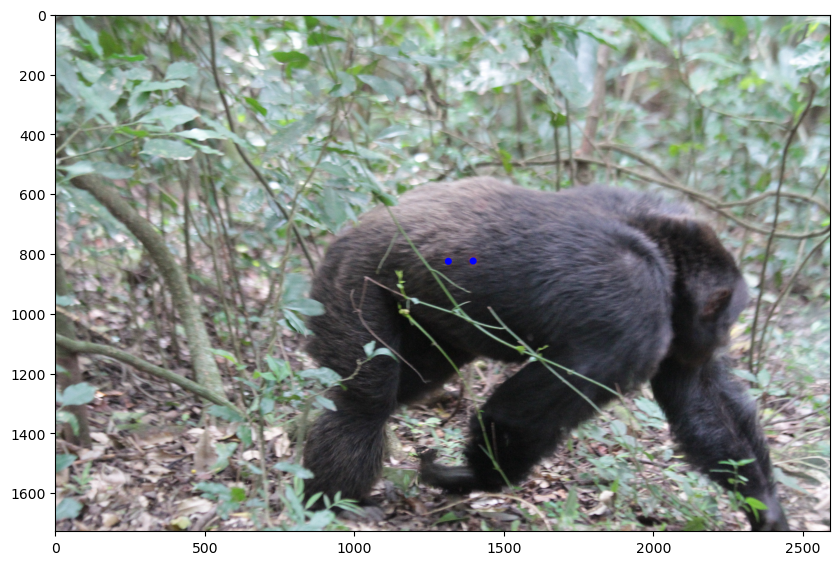

In [31]:
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2.circle(result, points[0],12,(0,0,255),-1)
cv2.circle(result, points[1],12,(0,0,255),-1)
plt.figure(figsize=(10,10))
plt.imshow(result)